In [ ]:
# default_exp export

# Export
> Exporting your learner and model together

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
#export
import torch
from fastcore.all import *
from fastai.learner import *
from fastai.basics import *

from fastexport.jit import *

## Exporting the dataloader and transforms
> Preprocessing

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'
def label_func(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    '.', get_image_files(path), valid_pct=0.2,
    label_func=label_func, item_tfms=Resize(224))
learn = cnn_learner(dls, resnet18)

In [ ]:
learn.to_jit('models/resnet.pt', mode=JitMode.Trace)

Just as before we can now load it in and perform inference:

In [ ]:
loaded_model = torch.jit.load("models/resnet.pt")
loaded_model.eval()
x,_ = dls.cpu().one_batch()

probs = loaded_model(x); probs[:3]

tensor([[-0.0410,  6.2403],
        [-0.2429,  7.0878],
        [-0.5723,  2.7101]], grad_fn=<SliceBackward>)

In [ ]:
@patch
def export_dls(self:Learner, fname='exported_dls.pkl'):
    self._end_cleanup()
    dls = self.dls.new_empty()
    print(f'Saving file to {fname}')
    torch.save(dls, str(fname), pickle_module=pickle, pickle_protocol=2)

In [ ]:
learn.export_dls('models/dls.pkl')

Saving file to models/dls.pkl


In [ ]:
dls = torch.load('models/dls.pkl')

out of dataset inference

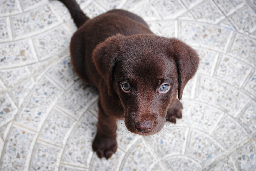

In [ ]:
puppy = 'tests/data/puppy.jpg'
Image.open(puppy).resize_max(max_w=256)

using the `test_dl`

In [ ]:
test_dl = dls.test_dl([puppy], bs=1)
x, = test_dl.one_batch()

In [ ]:
loaded_model(x)

tensor([[3.8019, 2.4617]], grad_fn=<MmBackward>)

## All together

In [ ]:
# ExportMode = SimpleNamespace(Fastai='fastai', Jit='jit')

In [ ]:
# @patch
# @delegates(Learner.to_jit)
# def new_export(self:Learner, fname='exported_learner', mode=ExportMode.Fastai, with_dls=True, **kwargs):
#     "Same as old export, but can also export to torchscript"
#     fname = Path(fname)
#     if mode == 'fastai':
#         self.export(fname.with_suffix('.pkl'))
#     if mode == 'jit':
#         self.to_jit(fname.with_suffix('.ts'), mode=JitMode.Trace, **kwargs)
#         self.export_dls(fname.with_name(fname.name + '_dls.pkl'))

In [ ]:
# learn.new_export('models/learner')

In [ ]:
# learn.new_export('models/model', mode=ExportMode.Jit)